# Building Good Training Sets – Data Pre-Processing

# Dealing with missing data

We typically see missing values as the blank spaces in our data table or as placeholder strings such as NaN (Not A Number)

Lets create a simple example

In [2]:
import pandas as pd
from io import StringIO

csv_data = u'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


For a larger DataFrame, it can be tedious to look for missing values manually

In [7]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

<br>
<br>

## Eliminating samples or features with missing values

One of the easiest ways to deal with missing data is to simply remove the corresponding features (columns) or samples (rows) from the dataset entirely.

In [8]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# drop columns
df.dropna(axis=1)      

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [10]:
# only drop rows where all columns are NaN
df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [14]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


<br>
<br>

## Imputing missing values

We can use different interpolation techniques to estimate the missing values from the other training samples in our dataset.

Most common is mean imputation

In [9]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [24]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imr = imr.fit(df)
#imputed_data = imr.transform(df.values)
imputed_data = imr.fit_transform(df)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [25]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

<br>
<br>

# Handling categorical data

It is not uncommon that real-world datasets contain one or more categorical feature columns.

Categorical data 
- nominal 
- ordinal (<,>)

In [46]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


<br>
<br>

## Mapping ordinal features

In [30]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [34]:
#size_mapping.items()
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<br>
<br>

## Encoding class labels

In [43]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y=df['classlabel'] = class_le.fit_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [44]:
class_le.inverse_transform(y)

array([0, 1, 0], dtype=int64)

## Processing on nominal features

In [52]:
df[['color','size']]

,color,size
0,green,M
1,red,L
2,blue,XL


In [54]:
pd.get_dummies(df[['price', 'color', 'size']])
#pd.get_dummies(df)

,price,color_blue,color_green,color_red,size_L,size_M,size_XL
0,10.1,0,1,0,0,1,0
1,13.5,0,0,1,1,0,0
2,15.3,1,0,0,0,0,1


<br>
<br>

# Bringing features onto the same scale

In [56]:
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()

#X_train_norm = mms.fit_transform(X_train)
#X_test_norm = mms.transform(X_test)

# Standard Scaler

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:
 xi–mean(x)-stdev(x)

If data is not normally distributed, this is not the best scaler to use.

In [3]:
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

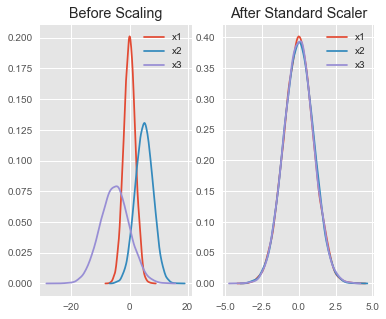

In [60]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

# Min-Max Scaler

The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:
xi–min(x)/ max(x)–min(x)
It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.
However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

In [63]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

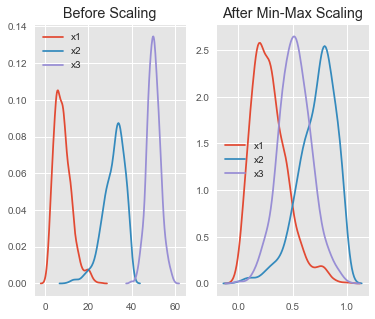

In [64]:
plt.clf
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

# Robust Scaler
The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:
xi–Q1(x)/Q3(x)–Q1(x)
For each feature.

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

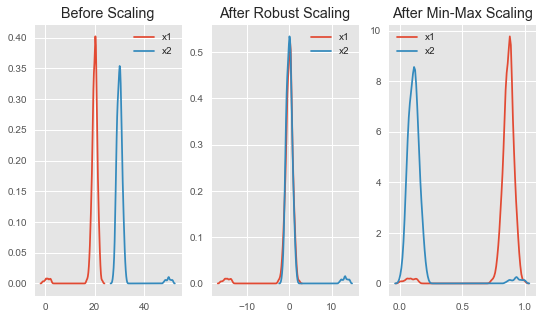

In [65]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
plt.clf
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

# Normalizer

The normalizer scales each value by dividing each value by its magnitude in nn-dimensional space for nn number of features.
Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

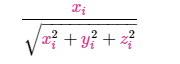
Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

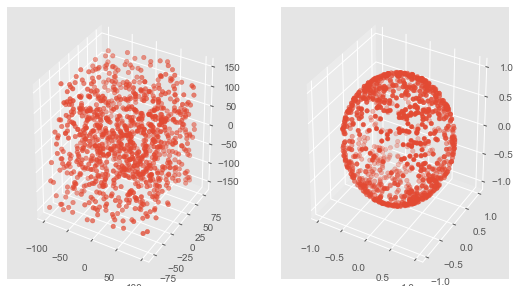

In [4]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()